# Data and information quality project

### Project description: DQ problem is Feature Dependency, ML task is Classification ("DecisionTree","LogisticRegression","KNN","RandomForest","AdaBoost","MLP")

### Import all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from A_data_collection import make_dataset_for_classification
from D_data_analysis import classification
from E_plot_results import plot
#from generate_correlated_features import inject_one_correlated_feature
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

/Users/ajeje/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/ajeje/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [3]:
import warnings

# Ignore all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


### List of Classification algorithms

In [4]:
CLASSIFICATION_ALGORITHMS = ["DecisionTree","LogisticRegression","KNN","RandomForest","AdaBoost","MLP"]

#Seed is set in order to assure reproducibility of experiments
SEED = 2023

### Create dataset for most of the experiments. And some data analysis

In [5]:
X, y = make_dataset_for_classification(n_samples=1000, n_features=5, n_informative=5, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, seed=2023)

In [6]:
def data_exploration(X_passed,y):
    # Convert the array to a DataFrame for better visualization (optional)
    number_of_columns= X_passed.shape[1]
    columns=list()
    for i in range(0,number_of_columns):
        columns.append(f"Feature {i}")
    df = pd.DataFrame(X_passed, columns=columns)

    # Display basic information about the structure
    print("Structure Information:")
    print(df.info())

    # Display the first few rows of the structure
    print("\nFirst Few Rows of the Structure:")
    print(df.head())

    # Summary statistics of the structure
    print("\nSummary Statistics:")
    print(df.describe())


    # Visualize the distribution of each feature using histograms
    df.hist(bins=20, figsize=(15, 10))
    plt.suptitle("Histograms of Features")
    plt.show()

    # Visualize the correlation matrix using a heatmap
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()

#APPLY PCA
    df['Target'] = y

    # Standardize the data
    scaler = StandardScaler()
    X_standardized = scaler.fit_transform(df.drop('Target', axis=1))

    # Perform PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(X_standardized)

    # Create a DataFrame with the principal components
    pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

    # Concatenate the principal components with the original DataFrame and the target variable
    final_df = pd.concat([pc_df, df['Target']], axis=1)

    # Visualize the data in the reduced-dimensional space, colored by the target variable
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='PC1', y='PC2', hue='Target', data=final_df, palette='viridis', alpha=0.7)
    plt.title('PCA: Reduced-dimensional Space with Target Variable')
    plt.xlabel('Principal Component 1 (PC1)')
    plt.ylabel('Principal Component 2 (PC2)')
    plt.legend(title='Target', loc='upper right', labels=['Class 0', 'Class 1'])
    plt.show()

Structure Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 0  1000 non-null   float64
 1   Feature 1  1000 non-null   float64
 2   Feature 2  1000 non-null   float64
 3   Feature 3  1000 non-null   float64
 4   Feature 4  1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB
None

First Few Rows of the Structure:
   Feature 0  Feature 1  Feature 2  Feature 3  Feature 4
0  -3.044852   0.401225   1.876653   1.566605  -2.132950
1   1.445783   1.330753   1.140285   0.706253   2.422165
2   2.404213   1.620161  -0.710273  -3.793487   1.183956
3   1.573431  -0.558834   0.359672   0.777892   2.637753
4  -0.849001   2.114740   3.329424  -1.255837  -1.173801

Summary Statistics:
         Feature 0    Feature 1    Feature 2    Feature 3    Feature 4
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
mean   

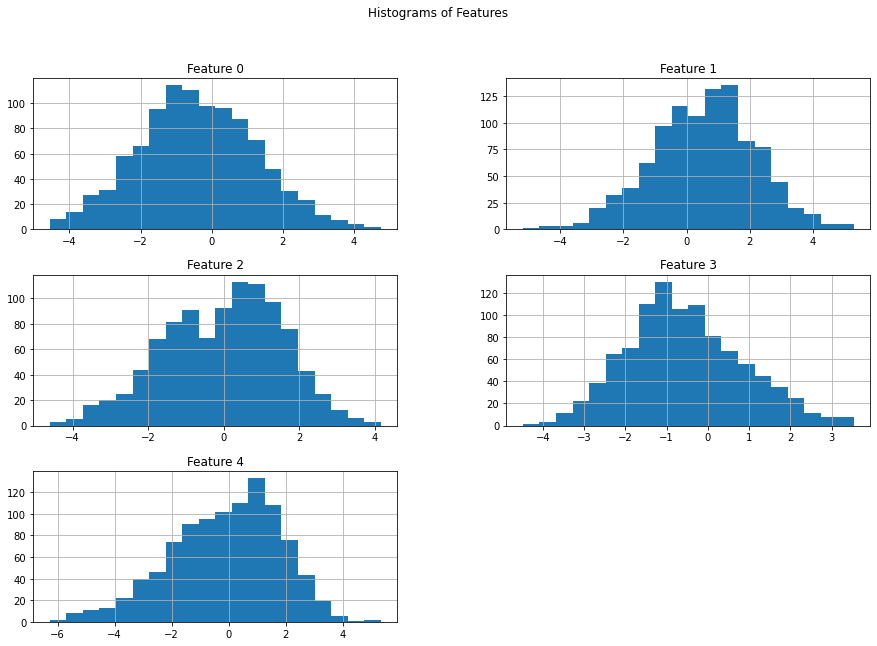

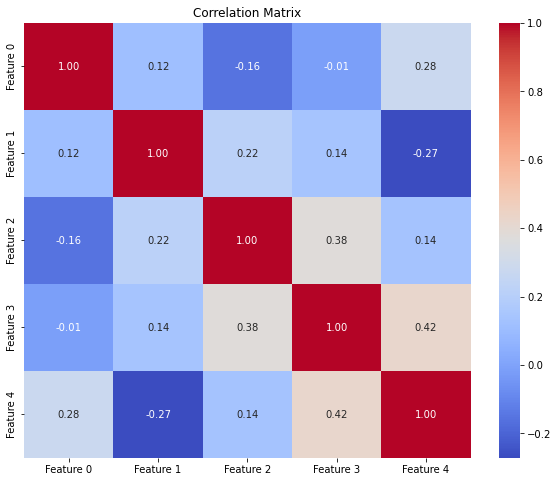

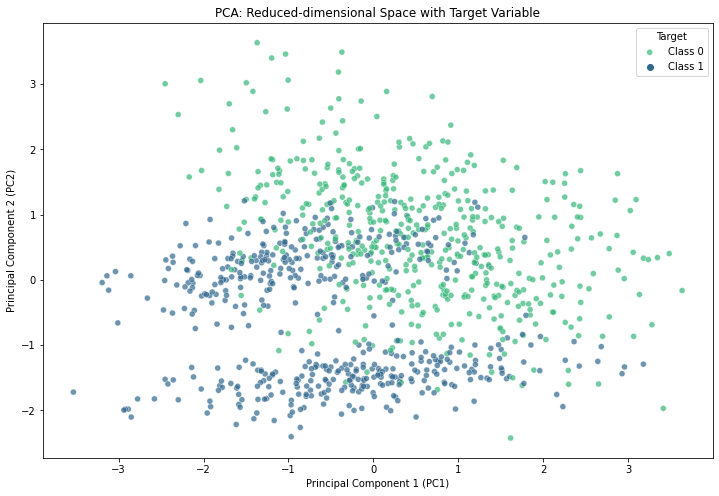

In [7]:
data_exploration(X,y)

### Experiment 1: introduce one correlated feature with an increasing correlation strength that starts with 0.5 till 1

Correlation is around 0.5 so not so high. Let's see how increasing the number of correlated features impacts on the results

In [8]:
def inject_one_correlated_feature(X, target_feature_index, correlation_strength):

    
    # Assuming you have a dataset X with 1000 records and 5 features
    # Replace this with your actual dataset or generate a sample dataset
    # Ensure that the correlation coefficient is within the valid range
    correlation_strength = np.clip(correlation_strength, -1, 1)

    new_feature = correlation_strength * X[:, target_feature_index] + np.sqrt(1 - correlation_strength**2) * np.random.randn(1000)

    #new_feature = correlation_strength * X[:, target_feature_index] + np.sqrt(1 - correlation_strength**2)
    
    # Inject the new feature into the original dataset
    X_with_new_feature = np.column_stack((X, new_feature.reshape(-1, 1)))


    # Print the correlation matrix to verify the correlation
    correlation_matrix = np.corrcoef(X_with_new_feature, rowvar=False)
    #print("Correlation Matrix:")
    #print(correlation_matrix)


    # Access the correlation between the original feature and the new feature
    correlation_with_target_feature = correlation_matrix[-1, target_feature_index]
    print(f"Correlation with the target feature: {correlation_with_target_feature}")


    #data_exploration(X_with_new_feature,y)

    return X_with_new_feature

In [9]:
results_for_each_algorithm = []
for algorithm in CLASSIFICATION_ALGORITHMS: # FIRST CICLE ON THE ALGORITHMS

    #print('qui')
    results_single_algorithm = []

    correlation_strength = 0.25

    #X, y = make_dataset_for_classification(n_samples=1000, n_features=5, n_informative=5, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, seed=2023)
    results_base_analysis = classification(X, y, algorithm, SEED)
    results_single_algorithm.append(results_base_analysis)

    for i in range(0, 6): # SECOND CICLE ON THE NUMBER OF POLLUTED DATASET THAT YOU WANT TO CREATE WITH DIFFERENT % OF POLLUTION
        # DATA COLLECTION: this is going to be eliminated
        #X, y = make_dataset_for_classification(n_samples=1000, n_features=7, n_informative=7, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, seed=2023)

        #Data pollution
        
        existing_feature_index = 0  # Choose the existing feature with which you want to correlate
        correlation_strength = correlation_strength + 0.1 # Adjust the correlation strength

        if i==5:
            correlation_strength=1
        
        X_with_new_feature = inject_one_correlated_feature(X, existing_feature_index, correlation_strength)
        
        #if i==5 and algorithm=='KNN':
        #    data_exploration(X_with_new_feature,y)
        
        # DATA ANALYSIS
        

        results_1_analysis = classification(X_with_new_feature, y, algorithm, SEED)
        results_single_algorithm.append(results_1_analysis)

    results_for_each_algorithm.append(results_single_algorithm)

Training for DecisionTree...
Correlation with the target feature: 0.543770466115191
Training for DecisionTree...
Correlation with the target feature: 0.6403294015135946
Training for DecisionTree...
Correlation with the target feature: 0.752188160579193
Training for DecisionTree...
Correlation with the target feature: 0.8012195953233645
Training for DecisionTree...
Correlation with the target feature: 0.8670538038857464
Training for DecisionTree...
Correlation with the target feature: 1.0
Training for DecisionTree...
Training for LogisticRegression...
Correlation with the target feature: 0.5316634638289414
Training for LogisticRegression...
Correlation with the target feature: 0.6174128034262113
Training for LogisticRegression...
Correlation with the target feature: 0.7353924574015789
Training for LogisticRegression...
Correlation with the target feature: 0.8236511076567744
Training for LogisticRegression...
Correlation with the target feature: 0.8931197872064411
Training for LogisticRe

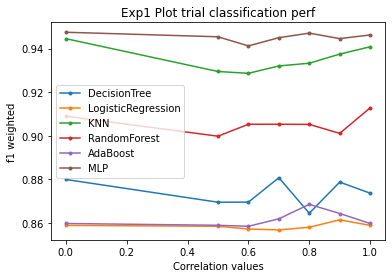

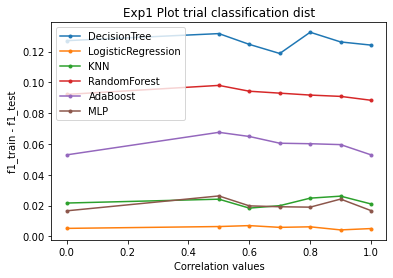

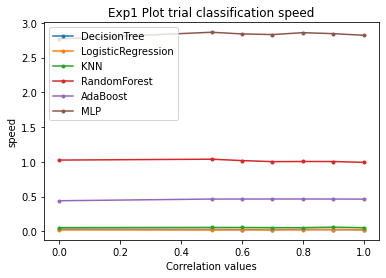

In [10]:
plot(x_axis_values=[0, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], x_label="Correlation values", results=results_for_each_algorithm, title="Exp1 Plot trial classification perf", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=[0, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], x_label="Correlation values", results=results_for_each_algorithm, title="Exp1 Plot trial classification dist", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=[0, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], x_label="Correlation values", results=results_for_each_algorithm, title="Exp1 Plot trial classification speed", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="speed")

### Experiment 2: growing number of features low correlation

In [11]:
results_for_each_algorithm = []
for algorithm in CLASSIFICATION_ALGORITHMS: # FIRST CICLE ON THE ALGORITHMS

    #print('qui')
    results_single_algorithm = []

    correlation_strength = 0.35

    #X, y = make_dataset_for_classification(n_samples=1000, n_features=5, n_informative=5, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, seed=2023)
    results_base_analysis = classification(X, y, algorithm, SEED)
    results_single_algorithm.append(results_base_analysis)

    X_with_new_feature = X

    for i in range(0, 6): # SECOND CICLE ON THE NUMBER OF POLLUTED DATASET THAT YOU WANT TO CREATE WITH DIFFERENT % OF POLLUTION
        # DATA COLLECTION: this is going to be eliminated
        #X, y = make_dataset_for_classification(n_samples=1000, n_features=7, n_informative=7, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, seed=2023)

        #Data pollution
        
        #existing_feature_index = 0  # Choose the existing feature with which you want to correlate
        for j in range(0,X.shape[1]):
            existing_feature_index = j
            print(existing_feature_index)
            X_with_new_feature = inject_one_correlated_feature(X_with_new_feature, existing_feature_index, correlation_strength)
        
        #if i==5 and algorithm=='KNN':
        #    data_exploration(X_with_new_feature,y)
        
        # DATA ANALYSIS
        

        results_1_analysis = classification(X_with_new_feature, y, algorithm, SEED)
        results_single_algorithm.append(results_1_analysis)

        print(X_with_new_feature.shape)

        
    
    
    results_for_each_algorithm.append(results_single_algorithm)

Training for DecisionTree...
0
Correlation with the target feature: 0.5060720339125763
1
Correlation with the target feature: 0.567888017731453
2
Correlation with the target feature: 0.5435757822043787
3
Correlation with the target feature: 0.46847512999595275
4
Correlation with the target feature: 0.5798800482966071
Training for DecisionTree...
(1000, 10)
0
Correlation with the target feature: 0.5246847461868082
1
Correlation with the target feature: 0.531214085299853
2
Correlation with the target feature: 0.4559620492378104
3
Correlation with the target feature: 0.5212257138389111
4
Correlation with the target feature: 0.6031282795674993
Training for DecisionTree...
(1000, 15)
0
Correlation with the target feature: 0.47673882400326156
1
Correlation with the target feature: 0.5483316903859456
2
Correlation with the target feature: 0.4747262638920742
3
Correlation with the target feature: 0.45630238828466757
4
Correlation with the target feature: 0.6057936286178419
Training for Decisio

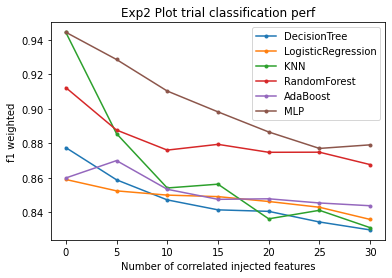

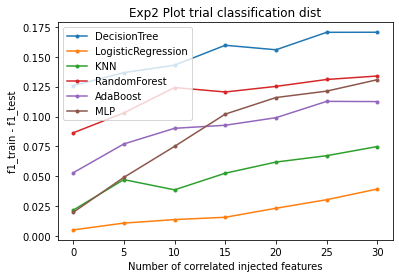

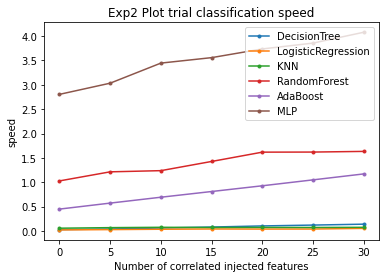

In [12]:
plot(x_axis_values=[0, 5, 10, 15, 20, 25, 30], x_label="Number of correlated injected features", results=results_for_each_algorithm, title="Exp2 Plot trial classification perf", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=[0, 5, 10, 15, 20, 25, 30], x_label="Number of correlated injected features", results=results_for_each_algorithm, title="Exp2 Plot trial classification dist", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=[0, 5, 10, 15, 20, 25, 30], x_label="Number of correlated injected features", results=results_for_each_algorithm, title="Exp2 Plot trial classification speed", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="speed")